In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Desafío Final: 
## Fichero opiniones_restaurantes.csv
Víctor González 100363949 - Ángel Luis Alonso 100363923 - Marcos Arroyo 100363919

## Primer paso

### Preparado de datos, carga de datos y organización-limpieza
Después de haber modificado el archivo **opiniones.csv** proporcionado (según explicamos en el documento **preparado_de_datos.pdf**), nos disponemos a analizar el mismo:



In [0]:
#Realizamos todos los imports en esta sección y definiciones

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import normalize
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tsa.seasonal import seasonal_decompose
from datetime import datetime, date, time, timedelta

In [0]:
opinions = pd.read_csv('opiniones_restaurantes.csv', delimiter = ',')
opinions.head(10)

,Unnamed: 0,opinion_id,usuario_id,negocio_id,puntuacion,util,divertido,guay,fecha
0,2564946,I59JegTz5rQ80emJP83ckQ,222_8pOPN2Ogy-gLNjudHw,0d0i0FaJq1GIeW1rS2D-5w,3.0,0.0,0.0,0.0,2018-11-14 18:12:40
1,1322186,r74B2ZI2g3UrCV64_VQ1sQ,XJNY_hMIYM_DWyh-AgJA3A,STtrEGylaYOXoXQFLP5OAQ,5.0,0.0,0.0,0.0,2018-11-14 18:09:01
2,1935996,rDXtld8MGHbT6N6T33rxMg,Sa_7X9IB3_E6b7w5M_kv2A,wPGjrXl1W0Bb8m2L7nBAew,4.0,0.0,0.0,0.0,2018-11-14 18:07:56
3,2640193,watGpzJoaL--yJ0ojQYS1A,s_FAHFKUl4YqNofYZC1NYg,VWtT4DKxQ4YVRWT88Z5SMA,4.0,1.0,1.0,1.0,2018-11-14 18:06:13
4,3265012,TP9xgd2y_2f73_CIpGbOVA,UTNefnQ3eZEbIxVu7ALO7Q,zb6PLyf8zHffr-rj3ez1lg,5.0,0.0,0.0,0.0,2018-11-14 18:02:40
5,3932614,dGsqzxkNkENJUkJowbsHTQ,_NtV-fd-RqVOjdq5jYVqIg,01xTdrNUuTOAyH7NaRWcUA,2.0,0.0,0.0,0.0,2018-11-14 18:02:13
6,3236039,MpiRYMkTjuDFbJn0s_anwA,C-ObuoSf6iXBnc0MgAJBrw,p0mrAI9F5obInFizyfc_0A,3.0,0.0,0.0,0.0,2018-11-14 18:00:45
7,3263322,GFgfugl2E4_NwzezExmS1w,e1tiq2UGCp9PJZNJEOcl3Q,RESDUcs7fIiihp38-d6_6g,1.0,0.0,0.0,0.0,2018-11-14 17:58:20
8,3221706,52Ff4iWvuowBI7HEPinDLQ,y5zqSJE-rFihsKmUZRbbRg,evdJO0v9rvVixieNEnaeJg,5.0,0.0,0.0,0.0,2018-11-14 17:57:01
9,3285260,0kR5e8LhoVwhyKM2Lq_2GQ,jlbB1GrWV3PnbgHze8r6Qg,Jd2NUZeVeyWi1tTNKXMt1Q,2.0,0.0,0.0,0.0,2018-11-14 17:55:21


In [0]:
opinions = opinions.drop(columns=["Unnamed: 0"])
print (opinions.isnull().sum())

opinion_id    0
usuario_id    0
negocio_id    0
puntuacion    0
util          0
divertido     0
guay          0
fecha         0
dtype: int64


In [0]:
opinions.fecha = opinions.fecha.apply(lambda x: datetime.strptime(x,"%Y-%m-%d %H:%M:%S").strftime("%Y-%m-%d")) 
opinions.head(10)

,opinion_id,usuario_id,negocio_id,puntuacion,util,divertido,guay,fecha
0,I59JegTz5rQ80emJP83ckQ,222_8pOPN2Ogy-gLNjudHw,0d0i0FaJq1GIeW1rS2D-5w,3.0,0.0,0.0,0.0,2018-11-14
1,r74B2ZI2g3UrCV64_VQ1sQ,XJNY_hMIYM_DWyh-AgJA3A,STtrEGylaYOXoXQFLP5OAQ,5.0,0.0,0.0,0.0,2018-11-14
2,rDXtld8MGHbT6N6T33rxMg,Sa_7X9IB3_E6b7w5M_kv2A,wPGjrXl1W0Bb8m2L7nBAew,4.0,0.0,0.0,0.0,2018-11-14
3,watGpzJoaL--yJ0ojQYS1A,s_FAHFKUl4YqNofYZC1NYg,VWtT4DKxQ4YVRWT88Z5SMA,4.0,1.0,1.0,1.0,2018-11-14
4,TP9xgd2y_2f73_CIpGbOVA,UTNefnQ3eZEbIxVu7ALO7Q,zb6PLyf8zHffr-rj3ez1lg,5.0,0.0,0.0,0.0,2018-11-14
5,dGsqzxkNkENJUkJowbsHTQ,_NtV-fd-RqVOjdq5jYVqIg,01xTdrNUuTOAyH7NaRWcUA,2.0,0.0,0.0,0.0,2018-11-14
6,MpiRYMkTjuDFbJn0s_anwA,C-ObuoSf6iXBnc0MgAJBrw,p0mrAI9F5obInFizyfc_0A,3.0,0.0,0.0,0.0,2018-11-14
7,GFgfugl2E4_NwzezExmS1w,e1tiq2UGCp9PJZNJEOcl3Q,RESDUcs7fIiihp38-d6_6g,1.0,0.0,0.0,0.0,2018-11-14
8,52Ff4iWvuowBI7HEPinDLQ,y5zqSJE-rFihsKmUZRbbRg,evdJO0v9rvVixieNEnaeJg,5.0,0.0,0.0,0.0,2018-11-14
9,0kR5e8LhoVwhyKM2Lq_2GQ,jlbB1GrWV3PnbgHze8r6Qg,Jd2NUZeVeyWi1tTNKXMt1Q,2.0,0.0,0.0,0.0,2018-11-14


Transformamos la fecha a año-mes-dia con el objetivo de crear las series temporales.

In [0]:
restaurantes = pd.read_csv('restaurants_only_limpio.csv', delimiter = ',')
restaurantes = restaurantes.rename(columns={"nombre":"nombre_restaurante","puntuacion": "puntuacion_restaurante"})
restaurantes = restaurantes.drop(columns=["Unnamed: 0","estado","codigo_postal","latitud","longitud","atributos","horas"])
restaurantes.head(5)

,negocio_id,nombre_restaurante,direccion,ciudad,puntuacion_restaurante,num_revisiones,abierto,categorias
0,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,2.5,128,1,Chinese
1,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,"10110 Johnston Rd, Ste 15",Charlotte,4.0,170,1,Sushi Bars
2,1Dfx3zM-rW4n-31KeC8sJg,Taco Bell,2450 E Indian School Rd,Phoenix,3.0,18,1,Breakfast & Brunch
3,fweCYi8FmbJXHCqLnwuk8w,Marco's Pizza,5981 Andrews Rd,Mentor-on-the-Lake,4.0,16,1,Italian
4,tstimHoMcYbkSC4eBA1wEg,Maria's Mexican Restaurant & Bakery,6055 E Lake Mead Blvd,Las Vegas,4.5,184,1,Mexican


In [0]:
users = pd.read_csv('datos_usuarios_restaurante_limpio.csv', delimiter = ',')
users = users.rename(columns={"nombre": "nombre_usuario","util":"util_usuario"})
users = users.drop("Unnamed: 0",1)
users.head(10)

,usuario_id,nombre_usuario,num_opiniones,usuario_desde,util_usuario,gracioso,guay,experto,seguidores,media_puntuacion,like_moda,like_extras,like_perfil,like_formato,like_lista,like_comentario,like_simple,like_guay,like_divertido,like_textos,like_fotos
0,dD0gZpBctWGdWo9WlGuhlA,Angela,17,2034,30,4,14,0,5,4.85,1,0,0,0,0,0,2,0,0,1,0
1,NQffx45eJaeqhFcMadKUQA,Trace,124,4023,202,70,185,0,15,4.53,13,3,0,2,0,12,8,14,14,3,5
2,CXi7I5J-ItLGJNyKPkI5gA,Cyndi,57,3095,72,22,34,0,4,4.10,2,1,0,0,0,2,1,1,1,2,1
3,hQ98T_hy1CoSWw55zA49VQ,Jamey,44,1505,16,3,2,0,0,3.10,0,0,0,0,0,0,0,0,0,0,0
4,J9HamWsxKorlPGUAXy-M9Q,Ronald,336,3500,431,189,228,6,19,3.81,11,2,3,0,0,12,15,19,19,8,4
5,t-nB38eHbeFuabXBdJMwvg,Katharine,412,4203,1816,463,1341,8,77,4.02,106,3,4,1,1,60,64,140,140,120,65
6,eSlOI3GhroEtcbaD_nFXJQ,Jason,2518,3124,16349,8340,13924,7,251,3.61,711,84,59,18,16,361,2861,2267,2267,274,218
7,27wlLX7e52vVEvNA4Ksccw,Sara,207,2563,289,72,133,6,33,3.82,13,6,2,2,0,27,29,16,16,11,11
8,QiDtS54JwTGeH81c-a84WQ,Maria,100,3611,363,90,203,3,21,4.39,33,6,2,6,0,36,61,75,75,19,18
9,NmC_ZemjAQ6TvzgeaAuTmA,Lindsay,87,4265,240,78,101,5,4,3.24,20,6,2,0,0,17,9,22,22,12,1


Al final decidimos quitar los *likes* porque no los consideramos necesarios, ni relevantes.


In [0]:
users = users.drop(columns=["like_perfil","like_formato","like_lista","like_simple","like_divertido","like_textos","gracioso","guay","like_guay","like_fotos","like_moda",	"like_extras",	"like_comentario"])
users.head(10)

,usuario_id,nombre_usuario,num_opiniones,usuario_desde,util_usuario,experto,seguidores,media_puntuacion
0,dD0gZpBctWGdWo9WlGuhlA,Angela,17,2034,30,0,5,4.85
1,NQffx45eJaeqhFcMadKUQA,Trace,124,4023,202,0,15,4.53
2,CXi7I5J-ItLGJNyKPkI5gA,Cyndi,57,3095,72,0,4,4.10
3,hQ98T_hy1CoSWw55zA49VQ,Jamey,44,1505,16,0,0,3.10
4,J9HamWsxKorlPGUAXy-M9Q,Ronald,336,3500,431,6,19,3.81
5,t-nB38eHbeFuabXBdJMwvg,Katharine,412,4203,1816,8,77,4.02
6,eSlOI3GhroEtcbaD_nFXJQ,Jason,2518,3124,16349,7,251,3.61
7,27wlLX7e52vVEvNA4Ksccw,Sara,207,2563,289,6,33,3.82
8,QiDtS54JwTGeH81c-a84WQ,Maria,100,3611,363,3,21,4.39
9,NmC_ZemjAQ6TvzgeaAuTmA,Lindsay,87,4265,240,5,4,3.24


In [0]:
opinions = opinions.merge(restaurantes,on="negocio_id")
opinions = opinions.merge(users,on="usuario_id")
opinions.head(6)

,opinion_id,usuario_id,negocio_id,puntuacion,util,divertido,guay,fecha,nombre_restaurante,direccion,ciudad,puntuacion_restaurante,num_revisiones,abierto,categorias,nombre_usuario,num_opiniones,usuario_desde,util_usuario,experto,seguidores,media_puntuacion
0,n0ytAYwkGIed3ObfsPfN2A,c4wRqAEQqM-Eex-W3o2b6w,0d0i0FaJq1GIeW1rS2D-5w,4.0,1.0,0.0,0.0,2018-11-13,Bruxie,"3782 S Las Vegas Blvd, South Tenant Block, Bld...",Las Vegas,4.5,1394,1,Breakfast & Brunch,Tasha,292,2256,327,3,25,3.94
1,Y4zBuoV7cLROv7O9yvTDFg,c4wRqAEQqM-Eex-W3o2b6w,X5uxdU9GHoUAqo2wmbg3OQ,4.0,0.0,0.0,0.0,2018-11-14,Island Malaysian Cuisine,"5115 Spring Mountain Rd, Ste 217",Las Vegas,4.0,265,1,Asian Fusion,Tasha,292,2256,327,3,25,3.94
2,P4x9D-cL45sq9N9ssOPQlQ,c4wRqAEQqM-Eex-W3o2b6w,ugLqbAvBdRDc-gS4hpslXw,5.0,0.0,0.0,0.0,2018-10-10,Yama Sushi,"1350 E Flamingo Rd, Ste 18",Las Vegas,4.0,1912,1,Sushi Bars,Tasha,292,2256,327,3,25,3.94
3,5TQLPJgYBFXhnSa7xNfizw,7L8utEpYiVj3pNNjZkQaLQ,0d0i0FaJq1GIeW1rS2D-5w,5.0,1.0,0.0,1.0,2018-11-09,Bruxie,"3782 S Las Vegas Blvd, South Tenant Block, Bld...",Las Vegas,4.5,1394,1,Breakfast & Brunch,Meghan,183,3231,313,3,22,3.94
4,zoyGt_kldPlNcxGEddgmXQ,7L8utEpYiVj3pNNjZkQaLQ,7nRlDLrob6oK5zmGo4Vpbg,5.0,0.0,0.0,1.0,2016-05-15,Blueberry Hill Family Restaurant,4875 W Flamingo Rd,Las Vegas,3.5,462,1,Salad,Meghan,183,3231,313,3,22,3.94
5,dEPwK6oRwdRUIBjKkH4gPQ,7L8utEpYiVj3pNNjZkQaLQ,CtZ3HujCLTChyoad_L-nHA,5.0,2.0,0.0,0.0,2017-08-05,PizzaRev,"7090 South Rainbow Blvd, Suite 110",Las Vegas,4.0,459,1,Pizza,Meghan,183,3231,313,3,22,3.94


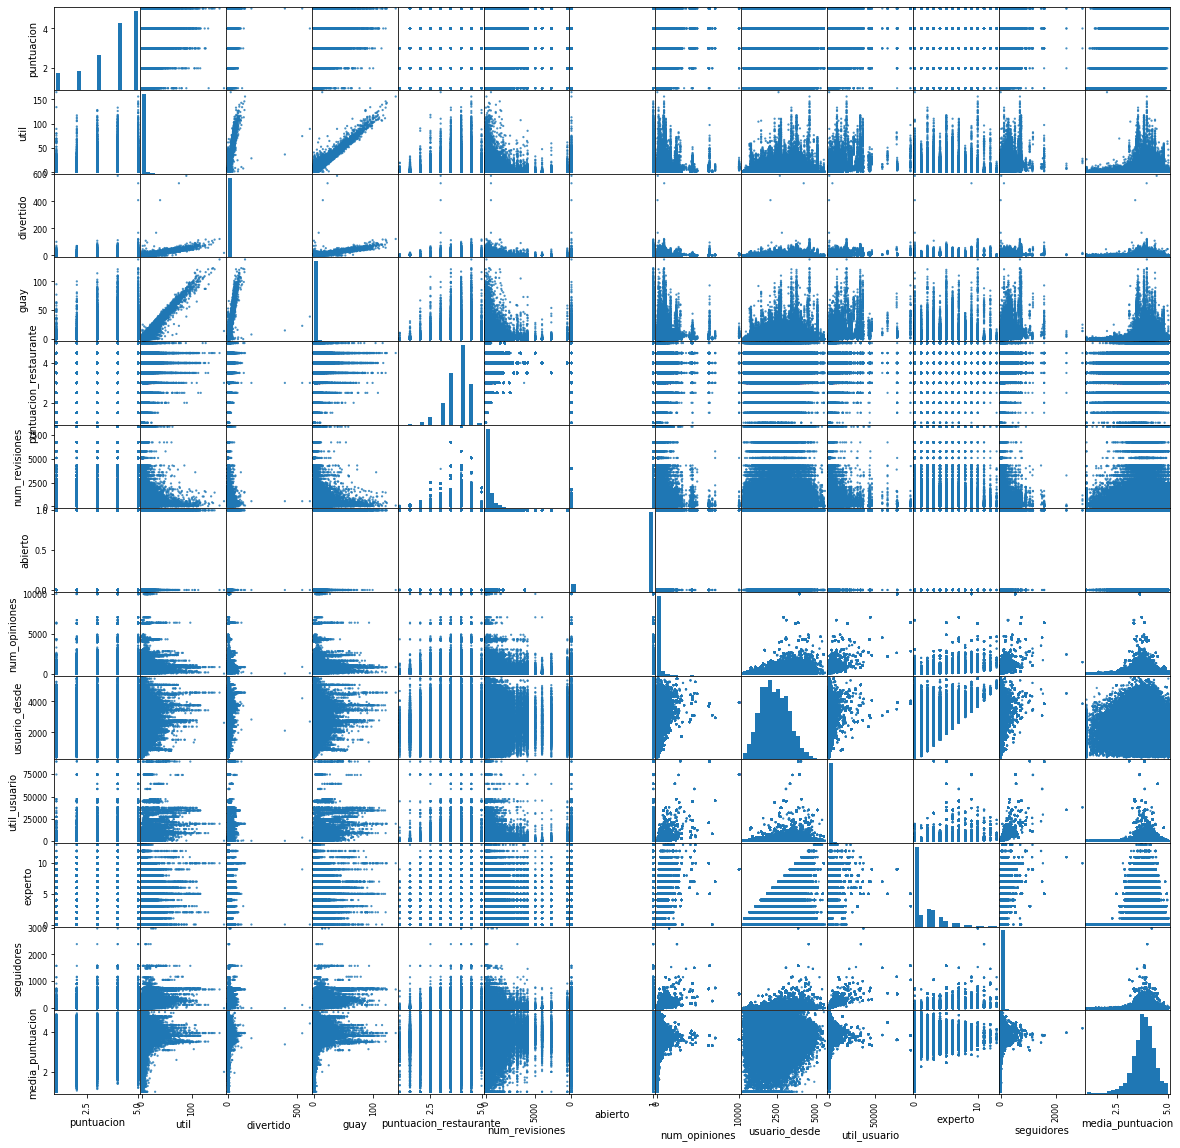

In [0]:
pd.plotting.scatter_matrix(opinions, figsize=(20, 20), marker='o',hist_kwds={'bins': 20}, s=5, alpha=.8)
plt.show()

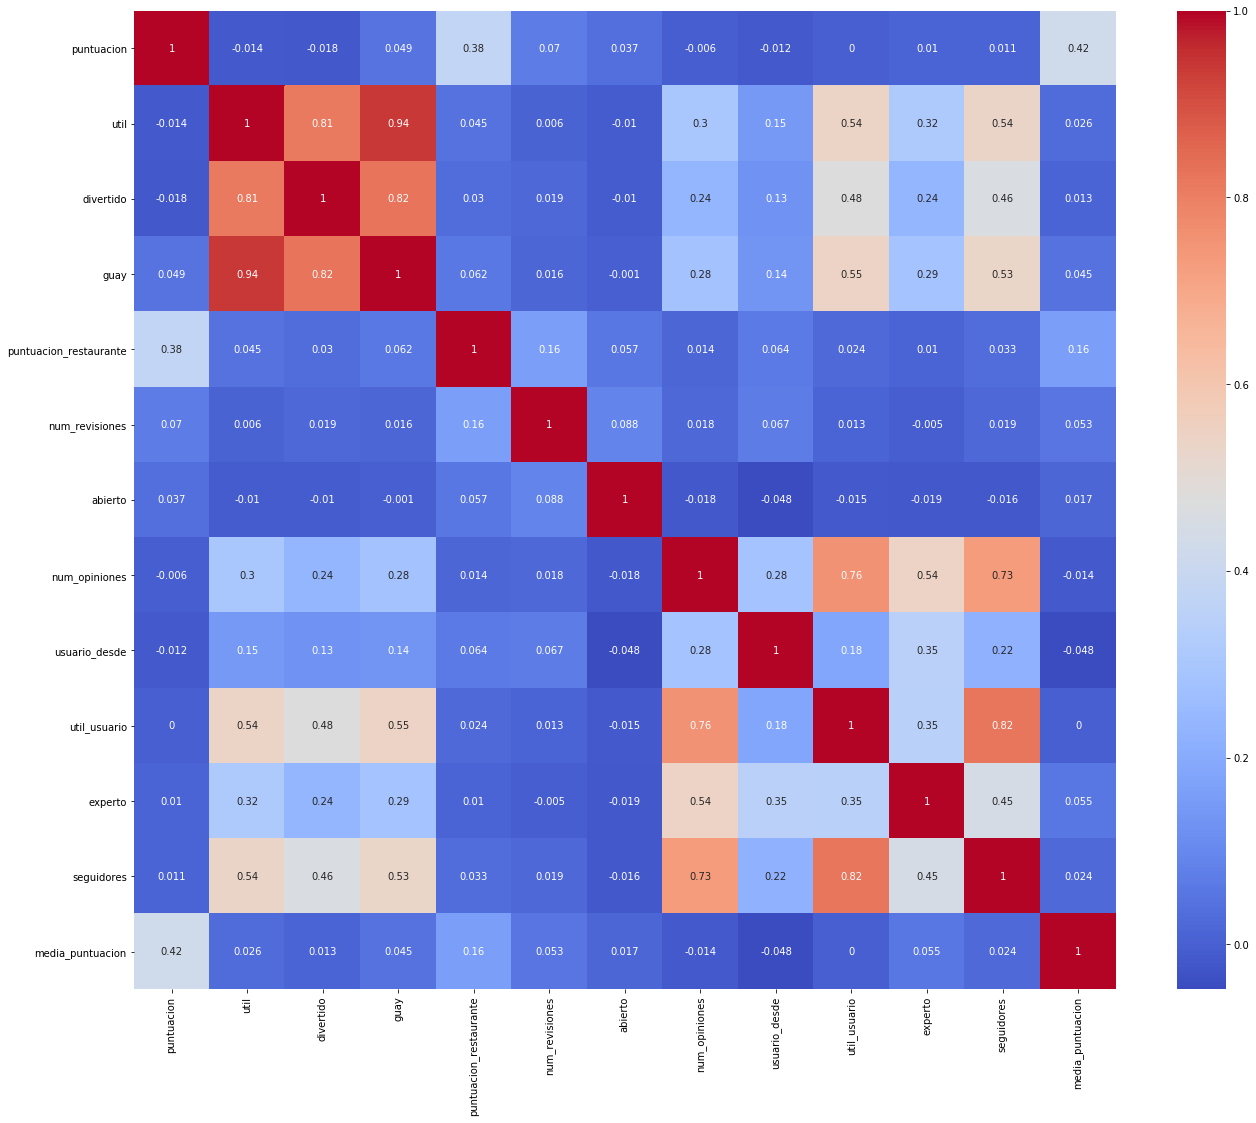

In [0]:
correlation_matrix = opinions.corr().round(3)
plt.subplots(figsize=(22,18))
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm')

##Analisis de Opiniones por zona y categoria.

En el jupyter de negocios analizado anteriormente hemos escogido los sitios con mas afluencia de gente. Asi podremos analizar que tipo de comida se deberia servir en nuestro restaurante con el fin de obtener buenas criticas.

In [0]:
opinionsLasVegasLastYear = opinions[opinions['ciudad'] == "Las Vegas"]

opinionsLasVegasLastYear = opinionsLasVegasLastYear[opinionsLasVegasLastYear['fecha'] >= '2018-01-01'].groupby(["categorias"])
count = opinionsLasVegasLastYear.count().opinion_id
rest = [len(i) for i in opinionsLasVegasLastYear.negocio_id.unique()]

opinionsLasVegasLastYear = opinionsLasVegasLastYear.mean()
opinionsLasVegasLastYear.insert(1,"numero_opiniones_categoria",count)
opinionsLasVegasLastYear.insert(1,"numero_restaurantes",rest)
opinionsLasVegasLastYear.sort_values(ascending=False,by="puntuacion")[opinionsLasVegasLastYear.numero_opiniones_categoria>1000].iloc[:,[0,1,2]]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


,puntuacion,numero_restaurantes,numero_opiniones_categoria
categorias,,,
Japanese,4.069492,53,1180
Italian,4.063867,70,1143
American (New),3.975081,109,2167
Breakfast & Brunch,3.970952,91,1859
Pizza,3.875341,107,1099
Mexican,3.870107,166,1686
Sandwiches,3.827468,95,1165
American (Traditional),3.811311,148,1892


Como podemos ver, en el **último año** la categoría mejor valorada fue la **japonesa**, seguida por la **italiana** y la **americana (new)**. Las dos primera obtienen una puntuación media muy parecidad, y la tercera se descuelga ligeramente. Cabe destacar, que la categoría americana ha recibido casi el doble de valoraciones que las dos primeras, por lo que podemos considerar que tiene una mayor afluencia de gente que las dos anteriores. También observamos que las categorías japonesa e italiana disponen de menos locales que el resto.

A la hora de elegir que restaurante nos gustaría poner, tenemos en cuenta que la categoría se una de las que obtienen **buenas valoraciones** pero también que no tengan **muchos restaurantes**, pues implica una **mayor competencia**. También nos interesa que tenga **bastantes valoraciones**, lo que quiere decir que atrae a las personas. En este sentido, elegiríamos montar restaurantes de comida **japonesa o italiana**, y evitaríamos los de comida **mexicana y americana** por el gran número de locales existentes.

In [0]:
opinionsLasVegasLast2Year = opinions[opinions['ciudad'] == "Las Vegas"]

opinionsLasVegasLast2Year = opinionsLasVegasLast2Year[opinionsLasVegasLast2Year['fecha'] < '2018-01-01']
opinionsLasVegasLast2Year = opinionsLasVegasLast2Year[opinionsLasVegasLast2Year['fecha'] >= '2017-01-01'].groupby(["categorias"])
count = opinionsLasVegasLast2Year.count().opinion_id
rest = [len(i) for i in opinionsLasVegasLast2Year.negocio_id.unique()]

opinionsLasVegasLast2Year = opinionsLasVegasLast2Year.mean()
opinionsLasVegasLast2Year.insert(1,"numero_opiniones_categoria",count)
opinionsLasVegasLast2Year.insert(1,"numero_restaurantes",rest)
opinionsLasVegasLast2Year.sort_values(ascending=False,by="puntuacion")[opinionsLasVegasLast2Year.numero_opiniones_categoria>1000].iloc[:,[0,1,2]]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()


,puntuacion,numero_restaurantes,numero_opiniones_categoria
categorias,,,
Cafes,4.245446,49,1043
Japanese,4.137991,52,1145
Seafood,3.979815,60,1189
Italian,3.961933,73,1366
Breakfast & Brunch,3.946093,86,2022
American (New),3.846596,112,2438
American (Traditional),3.819577,163,2411
Sandwiches,3.789263,102,1248
Pizza,3.782084,113,1161


Como podemos ver, en los **últimos 2 años** las categorías mejor valoradas fueron: **cafes**, **japones** y ***seafood***. Las dos primera obtienen una alta puntuación media, y la tercera se descuelga ligeramente. Cabe destacar, que la categoría americana (tanto nueva como tradicional) ha recibido más del doble de valoraciones que las dos primeras, por lo que podemos considerar que tiene una mayor afluencia de gente que las dos anteriores. También que las categorías americanas, la de pizza y la mexicana son las que más locales tienen.

Para elegir que local poner según estos datos, seguiremos la misma dinámica que hemos empleado anteriormente. En este caso, elegiríamos montar claramente un café. Tienen muy buena valoración, parecen tener una afluencia de gente bastante decente y no hay muchos locales en la zona. La segunda opción sería un japones, pero hay que tener en cuenta que es más complicado de dirigir que una cafetería.

In [0]:
opinionsTorontoLastYear = opinions[opinions['ciudad'] == "Toronto"]

opinionsTorontoLastYear = opinionsTorontoLastYear[opinionsTorontoLastYear['fecha'] >= '2018-01-01'].groupby(["categorias"])
count = opinionsTorontoLastYear.count().opinion_id
rest = [len(i) for i in opinionsTorontoLastYear.negocio_id.unique()]

opinionsTorontoLastYear = opinionsTorontoLastYear.mean()
opinionsTorontoLastYear.insert(1,"numero_opiniones_categoria",count)
opinionsTorontoLastYear.insert(1,"numero_restaurantes",rest)
opinionsTorontoLastYear.sort_values(ascending=False,by="puntuacion")[opinionsTorontoLastYear.numero_opiniones_categoria>900].iloc[:,[0,1,2]]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


,puntuacion,numero_restaurantes,numero_opiniones_categoria
categorias,,,
Cafes,3.855446,129,1010


In [0]:
opinionsTorontoLast2Year = opinions[opinions['ciudad'] == "Toronto"]

opinionsTorontoLast2Year = opinionsTorontoLast2Year[opinionsTorontoLast2Year['fecha'] < '2018-01-01']
opinionsTorontoLast2Year = opinionsTorontoLast2Year[opinionsTorontoLast2Year['fecha'] >= '2017-01-01'].groupby(["categorias"])
count = opinionsTorontoLast2Year.count().opinion_id
rest = [len(i) for i in opinionsTorontoLast2Year.negocio_id.unique()]

opinionsTorontoLast2Year = opinionsTorontoLast2Year.mean()
opinionsTorontoLast2Year.insert(1,"numero_opiniones_categoria",count)
opinionsTorontoLast2Year .insert(1,"numero_restaurantes",rest)
opinionsTorontoLast2Year.sort_values(ascending=False,by="puntuacion")[opinionsTorontoLast2Year.numero_opiniones_categoria>900].iloc[:,[0,1,2]]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()


,puntuacion,numero_restaurantes,numero_opiniones_categoria
categorias,,,
Cafes,3.918388,147,968
Japanese,3.642162,87,925


Como observamos, en Toronto, el último año solo hubo una categoría que superó las 1000 opiniones. En comparación con Las Vegas, podemos decir que habría una menor cantidad de clientes, en comparación.

En los 2 últimos años, los más visitado han sido los establecimientos de las categorías cafés y japonés. 

Observando los datos, el establecimiento que más nos podría interesar serían los de comida japonesa. Estos son bien valorados, o sea, gustan a la gente; y no tienen tantos locales como los cafés.

In [0]:
opinionsPhoenixLastYear = opinions[opinions['ciudad'] == "Phoenix"]

opinionsPhoenixLastYear = opinionsPhoenixLastYear[opinionsPhoenixLastYear['fecha'] >= '2018-01-01'].groupby(["categorias"])
count = opinionsPhoenixLastYear.count().opinion_id
rest = [len(i) for i in opinionsPhoenixLastYear.negocio_id.unique()]

opinionsPhoenixLastYear = opinionsPhoenixLastYear.mean()
opinionsPhoenixLastYear.insert(1,"numero_opiniones_categoria",count)
opinionsPhoenixLastYear.insert(1,"numero_restaurantes",rest)
opinionsPhoenixLastYear.sort_values(ascending=False,by="puntuacion")[opinionsPhoenixLastYear.numero_opiniones_categoria>1000].iloc[:,[0,1,2]]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


,puntuacion,numero_restaurantes,numero_opiniones_categoria
categorias,,,
American (New),3.910927,72,1089
Mexican,3.876122,135,1114


In [0]:
opinionsPhoenixLast2Year = opinions[opinions['ciudad'] == "Phoenix"]

opinionsPhoenixLast2Year = opinionsPhoenixLast2Year[opinionsPhoenixLast2Year['fecha'] < '2018-01-01']
opinionsPhoenixLast2Year = opinionsPhoenixLast2Year[opinionsPhoenixLast2Year['fecha'] >= '2017-01-01'].groupby(["categorias"])
count = opinionsPhoenixLast2Year.count().opinion_id
rest = [len(i) for i in opinionsPhoenixLast2Year.negocio_id.unique()]

opinionsPhoenixLast2Year = opinionsPhoenixLast2Year.mean()
opinionsPhoenixLast2Year.insert(1,"numero_opiniones_categoria",count)
opinionsPhoenixLast2Year.insert(1,"numero_restaurantes",rest)
opinionsPhoenixLast2Year.sort_values(ascending=False,by="puntuacion")[opinionsPhoenixLast2Year.numero_opiniones_categoria>1000].iloc[:,[0,1,2]]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()


,puntuacion,numero_restaurantes,numero_opiniones_categoria
categorias,,,
Breakfast & Brunch,4.002921,75,1027
American (New),3.936630,78,1436
Mexican,3.847896,143,1236


En Phoenix, lo mejor valorado el último año, con un número de opiniones decente, son los establecimientos de la categoría *American (new)*. Lo segundo mejor valorado ha sido la comida mexicana.

En los últimos 2 años, la comida americana es superada por los establecimientos *breakfast & brunch*, en cuanto a valoración obtenida. 

El establecimiento que podríamos montar en esta ciudad sería un *breakfast & brunch*, aunque hay que tener en mente que han perdido fuerza en el último año. O podríamos poner un restaurante de comida americana moderna. Estos tienen una puntuación de prácticamente 4 puntos sobre 5, tienen un buen número de opiniones y por lo tanto de clientes, y además no tienen excesivos establecimientos, dentro de lo que cabe. 

Lo que si descartaríamos sería hacer un restaurante de comída mexicana, debido a la alta competencia, prácticamente el doble de establecimientos que en las otra categorías. 

In [0]:
opinionsLasVegas = opinions[opinions['ciudad'] == "Las Vegas"]

opinionsLasVegasJapanese = opinionsLasVegas[opinionsLasVegas["categorias"] == "Japanese"]
opinionsLasVegasJapanese.index =  pd.to_datetime(opinionsLasVegasJapanese.fecha) 
opinionsLasVegasJapanese = opinionsLasVegasJapanese.drop("fecha",1)

opinionsLasVegasCafe = opinionsLasVegas[opinionsLasVegas["categorias"] == "Cafes"]
opinionsLasVegasCafe.index =  pd.to_datetime(opinionsLasVegasCafe.fecha) 
opinionsLasVegasCafe = opinionsLasVegasCafe.drop("fecha",1)


opinionsLasVegasAmericanNew = opinionsLasVegas[opinionsLasVegas["categorias"] == "American (New)"]
opinionsLasVegasAmericanNew.index =  pd.to_datetime(opinionsLasVegasAmericanNew.fecha) 
opinionsLasVegasAmericanNew = opinionsLasVegasAmericanNew.drop("fecha",1)



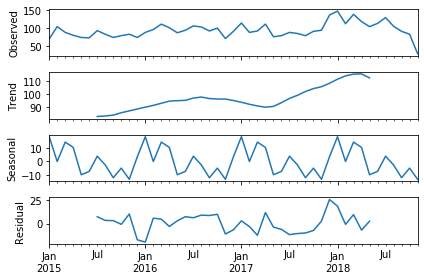

In [0]:
result = seasonal_decompose(opinionsLasVegasJapanese.index.value_counts().resample('M').sum(),model = 'additive')
result.plot()
plt.show()

Como podemos observar en las gráficas de arriba, los restaurantes de comida japonesa tienen una endencia al alza en general. Se observan ligeras caídas, en este caso entre abril y mayo de 2017 es el punto más bajo de opiniones. Tras esto vuelven a subir, y a principios de 2018 se observa que la tendencia cambia a la baja.

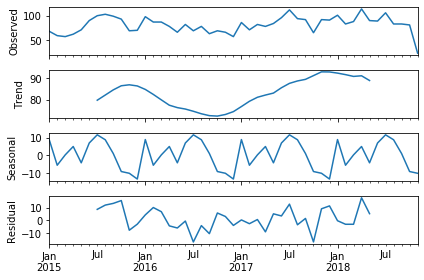

In [0]:
result = seasonal_decompose(opinionsLasVegasCafe.index.value_counts().resample('M').sum(),model = 'additive')
result.plot()
plt.show()

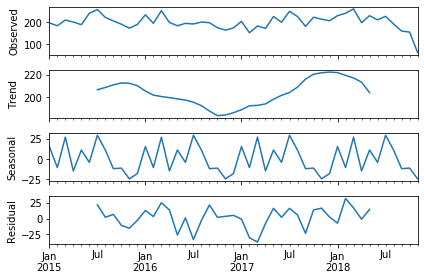

In [0]:
result = seasonal_decompose(opinionsLasVegasAmericanNew.index.value_counts().resample('M').sum(),model = 'additive')
result.plot()
plt.show()

En los casos de la comida amreicana moderna y los cafés se observa una tendencia en forma de valle. En ambos casos coincide con el final de 2016 y en el comienzo de 2017, el número de opiniones recibidas empieza a crecer de nuevo.

Vemos que para finales de 2017 las opiniones alcanzan su máximo y la endencia cambia a la baja. Este cambio es más acusado para los restaurantes de comida americana. Podemos interpretar el descenso de opiniones con un descenso en la afluencia de clientes, aunque puede ser que se gente que ya ha ido a ese local y por lo tanto no lo comenta.

En las tres series temporales podemos observar el mismo patrón en la gráfica *seasonal*. Este patrón nos indica que en las fiestas navideñas, en Las Vegas, el número de visitantes disminuye. Todo lo contrario que en los meses de verano y Enero donde la afluencia de gente es la mayor del año.


Por último habiendo analizado las tres series temporales en Las Vegas podemos decir que si una persona monta un restaurante en Las Vegas ofreciendo comida Japonesa tendrá un probabilidad de triunfar en la página web de donde provienen los datos.
